<a href="https://colab.research.google.com/github/xslittlemaggie/ML-DL-Algorithm-Notes/blob/master/Comparison%20of%20the%20Performance%20of%20Different%20Classifiers%20on%20Different%20types%20of%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> Comparison of the Performance of Different Classifiers on Different types of data<center></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 24px">
    <ol>
        <li><a href="#Part One">Part One: Get similar different of datasets</a></li>
      <li><a href="#Part Two">Part Two: </a></li>
      <li><a href="#Part Three">Part Three: Decision Tree Model Building & Visualization</a></li>
      <li><a href="#Part Four">Part Four: Some Important Decision Tree parameters</a></li>
    </ol>
</div>
<br>
<hr>

# **Step 0**: Import libraries

In [0]:
import numpy as np

# visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data
from sklearn.datasets import make_moons, make_circles, make_classification

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split

# **Step 1**: Get the three different types of data

- Moon separately

- Circle separately

- Linear separately

## 1. Moon separately data

The shape of the data: (100, 2)


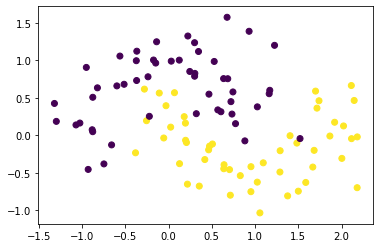

In [168]:
moon_data = make_moons(noise=0.3, random_state=0)
moon_X, moon_y = moon_data[0], moon_data[1]
print("The shape of the data: {}".format(moon_X.shape))

# visualize the moon data
plt.scatter(moon_X[:, 0], moon_X[:, 1], c = moon_y)
plt.show()

## 2. Circle separately data

The shape of the data: (100, 2)


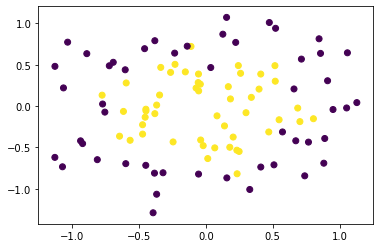

In [172]:
circle_data = make_circles(noise=0.2, factor=0.5, random_state=1)
circle_X, circle_y = circle_data[0], circle_data[1]
print("The shape of the data: {}".format(circle_X.shape))

# visualize the circle data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c = circle_y)
plt.show()

## 3. Linear separately data

The shape of the data: (100, 2)


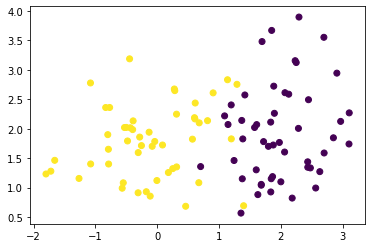

In [175]:
linear_data = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

rng = np.random.RandomState(2)
linear_X, linear_y = linear_data[0], linear_data[1]
linear_X += 2 * rng.uniform(size=linear_X.shape)

print("The shape of the data: {}".format(linear_X.shape))

# visualize the linear data
plt.scatter(linear_X[:, 0], linear_X[:, 1], c = linear_y)
plt.show()

## **Stpe 4**: Comparison of the different model performance among these 3 different types

- Logistic Regression

- Decision Tree

- Random Forest

- SVM (Gaussion)

## 1. Standardize the fetures for all of the 3 datasets

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


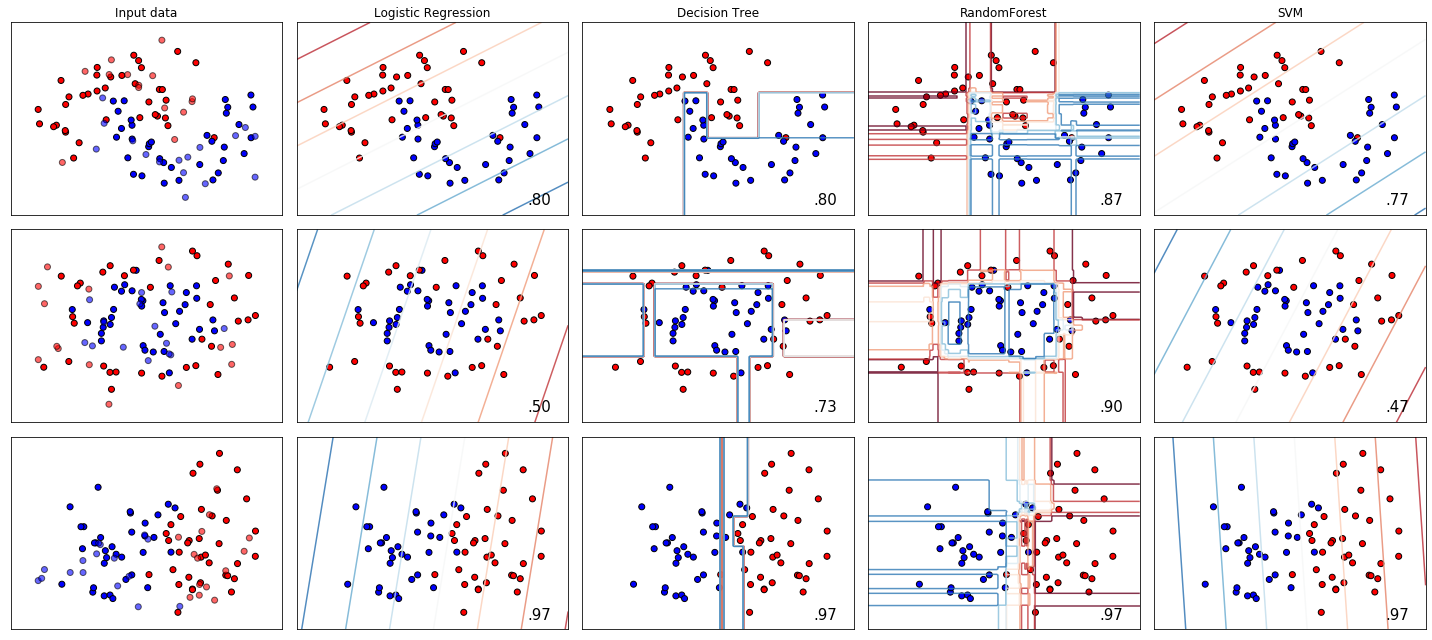

In [225]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

datasets = [moon_data, circle_data, linear_data]

names = ["Logistic Regression", "Decision Tree", "RandomForest", "SVM"]

classifiers = [LogisticRegression(), 
               DecisionTreeClassifier(max_depth = 5),
               RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1), 
               SVC(kernel = "linear", C = 0.025)]

figure = plt.figure(figsize = (20, 9))

h = 0.02
i = 1
# split data, standardize data
for ds_idx, ds in enumerate(datasets):
  X, y = ds
  X = StandardScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # 1. plot the dataset
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
  if ds_idx == 0:
    ax.set_title("Input data")

  # 2. plot training dataset
  ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")

  # 3. plot testing dataset
  ax.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap = cm_bright, alpha = 0.6, edgecolors = "k")
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # plot the decision boundary
    if hasattr(clf, "decision_function"):
      Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
      Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap = cm, alpha = 0.8)

    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = cm_bright, edgecolors = "k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_idx == 0:
      ax.set_title(name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3, "{:.2f}".format(score).lstrip("0"), #("%.2f" % score).lstrip("0"),
            size = 15, horizontalalignment = "right")
    i += 1

plt.tight_layout()
plt.show()
  


# References:
URL_1 = "https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html"